<a href="https://colab.research.google.com/github/rishika-p/-NNDL-/blob/main/Assignment_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import math
import random
import matplotlib.pyplot as plt
from random import shuffle

In [33]:
number_of_samples = 4
learning_rate = 0.1
epochs = 100
batch_size = 2
m = -1
c = 1
v_m = 0
v_c = 0
momentum_coeff = 0.9
number_of_batches = number_of_samples//batch_size
x = [0.2,0.4,0.6,0.8]
y = [3.4,3.8,4.2,4.6]
data = list()
for i in range(4):
  data.append((x[i],y[i]))
print(data)

[(0.2, 3.4), (0.4, 3.8), (0.6, 4.2), (0.8, 4.6)]


In [34]:
def gradient_of_m(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-m*d[i][0]-c)*d[i][0]
    return -1*sum/len(d)

In [35]:
def gradient_of_c(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-m*d[i][0]-c)
  return -1*sum/len(d)

In [36]:
def error(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + math.pow(d[i][1]-m*d[i][0]-c,2)
  return 0.5*sum/len(d)

In [38]:
error_list = []
for i in range(epochs):
  for j in range(number_of_batches):
    if j == number_of_batches:
      d = data[j*batch_size:]
    else:
      d = data[j*batch_size:(j+1)*batch_size]
    delta_m = -1*learning_rate*gradient_of_m(d,m,c)
    delta_c = -1*learning_rate*gradient_of_c(d,m,c)

    v_m = v_m*momentum_coeff + delta_m
    v_c = v_c*momentum_coeff + delta_c

    m = m + v_m
    c = c + v_c
    
    error_list.append(error(d,m,c))
  random.shuffle(data)
  print("optimal value of m, c :",m,c)

optimal value of m, c : -0.845768 1.93018
optimal value of m, c : -0.4415530425919998 3.6305389425600003
optimal value of m, c : -0.05431982517154735 5.227157236019121
optimal value of m, c : 0.1677348993027224 6.133458235200095
optimal value of m, c : 0.16574626498951261 5.984890504197539
optimal value of m, c : 0.015219058640661629 5.133135928523659
optimal value of m, c : -0.2084031219372542 4.007775368035831
optimal value of m, c : -0.3582818102731834 3.1178698689919755
optimal value of m, c : -0.3536999921007082 2.8492356234864107
optimal value of m, c : -0.2623806494974745 3.1003501872927033
optimal value of m, c : -0.055848762294324145 3.664386902570536
optimal value of m, c : 0.24097698999010742 4.273453307861912
optimal value of m, c : 0.45228390195674606 4.621608473194708
optimal value of m, c : 0.5574353567988132 4.5648951474589055
optimal value of m, c : 0.5784329319433604 4.234339809216954
optimal value of m, c : 0.5472681662237076 3.7847870443356784
optimal value of m, c 

Text(0, 0.5, 'error')

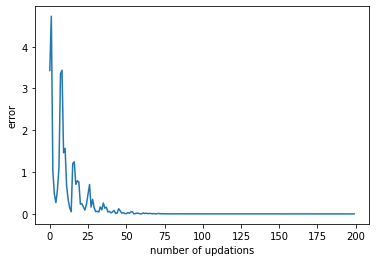

In [39]:
x_1 = range(100*(number_of_batches))
y_1 = error_list
plt.plot(x_1,y_1)
plt.xlabel("number of updations")
plt.ylabel("error")


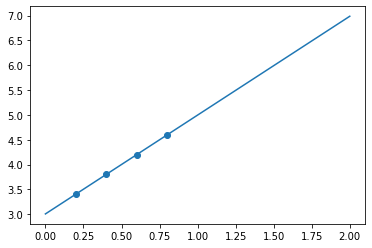

In [40]:
x_2 = range(0,3)
y_2 = [m*i+c for i in x_2]
plt.plot(x_2,y_2)
plt.scatter(x,y)